In [2]:
import tensorflow as tf
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
sample = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')

# Preprocessing Step

## Split the train dataset to train set and validation set

In [4]:
validation = train[29400:]
train = train[:29400]

## Scaled the data to 0 and 1 

In [5]:
train_data = train.drop('label', axis =1).to_numpy()
train_images = train_data.reshape(-1, 28, 28, 1)
train_images = train_images.astype('float32') / 255.0

In [6]:
validation_data = validation.drop('label', axis =1).to_numpy()
validation_labels = validation['label']

validation_data_scaled = validation_data / 255.0
    
# Reshape validation_data to (batch_size, height, width, channels)
validation_data_reshaped = validation_data_scaled.reshape(-1, 28, 28, 1)

# Construct the validation data tuple
validation_data_tuple = (validation_data_reshaped, validation_labels)

In [7]:
train_images.shape, validation_data.shape

((29400, 28, 28, 1), (12600, 784))

## Data augmentation

In [8]:
# Define the zoom range
zoom_range = (0.8, 1.2)  # Zoom in/out by a factor between 0.8 and 1.2

train_labels = train['label']
# Define the ImageDataGenerator with zoom augmentation options
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    zoom_range=zoom_range  # Zoom in/out on images by the specified range
)

# Fit the ImageDataGenerator on your training data
train_datagen.fit(train_images)  


# Generate augmented data batches
batch_size = 32
augmented_train = train_datagen.flow(train_images, train_labels,  batch_size=batch_size)

# Build CNN model

In [9]:
import tensorflow as tf

# Define your model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model 
model.fit(augmented_train, validation_data = validation_data_tuple, epochs = 50)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 16/919 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - accuracy: 0.1554 - loss: 2.2557

I0000 00:00:1710751746.358371     108 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


919/919 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.8170 - loss: 0.5639 - val_accuracy: 0.9761 - val_loss: 0.0763
Epoch 2/50
919/919 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9732 - loss: 0.0875 - val_accuracy: 0.9848 - val_loss: 0.0509
Epoch 3/50
919/919 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.9806 - loss: 0.0602 - val_accuracy: 0.9866 - val_loss: 0.0442
Epoch 4/50
919/919 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9845 - loss: 0.0475 - val_accuracy: 0.9865 - val_loss: 0.0448
Epoch 5/50
919/919 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9884 - loss: 0.0385 - val_accuracy: 0.9822 - val_loss: 0.0553
Epoch 6/50
919/919 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9869 - loss: 0.0357 - val_accuracy: 0.9887 - val_loss: 0.0388
Epoch 7/50
919/919 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9894 - loss: 0.0322 - val_accuracy: 0.9898 - val_loss: 0.0366
Epoch 8/50
919/919 ━━━━━━━━━━━━━━━━━━━━ 11s 12ms/step - accuracy: 0.9909 - loss: 0.0269 - val_accurac

# Prediction

In [10]:
test_data = test.to_numpy()

test_data_scaled = test_data / 255.0
    
# Reshape validation_data to (batch_size, height, width, channels)
test_data_reshaped = test_data_scaled.reshape(-1, 28, 28, 1)

In [11]:
test_data_reshaped.shape

(28000, 28, 28, 1)

In [12]:
y_preds = model.predict(test_data_reshaped)

875/875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


In [13]:
final = y_preds.argmax(axis =1)

In [14]:
image_id = np.arange(1,28001)
image_id

array([    1,     2,     3, ..., 27998, 27999, 28000])

In [15]:
submission = pd.DataFrame({'ImageId': image_id, 'Label': final})
submission.to_csv('submission.csv', index = False)

In [16]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


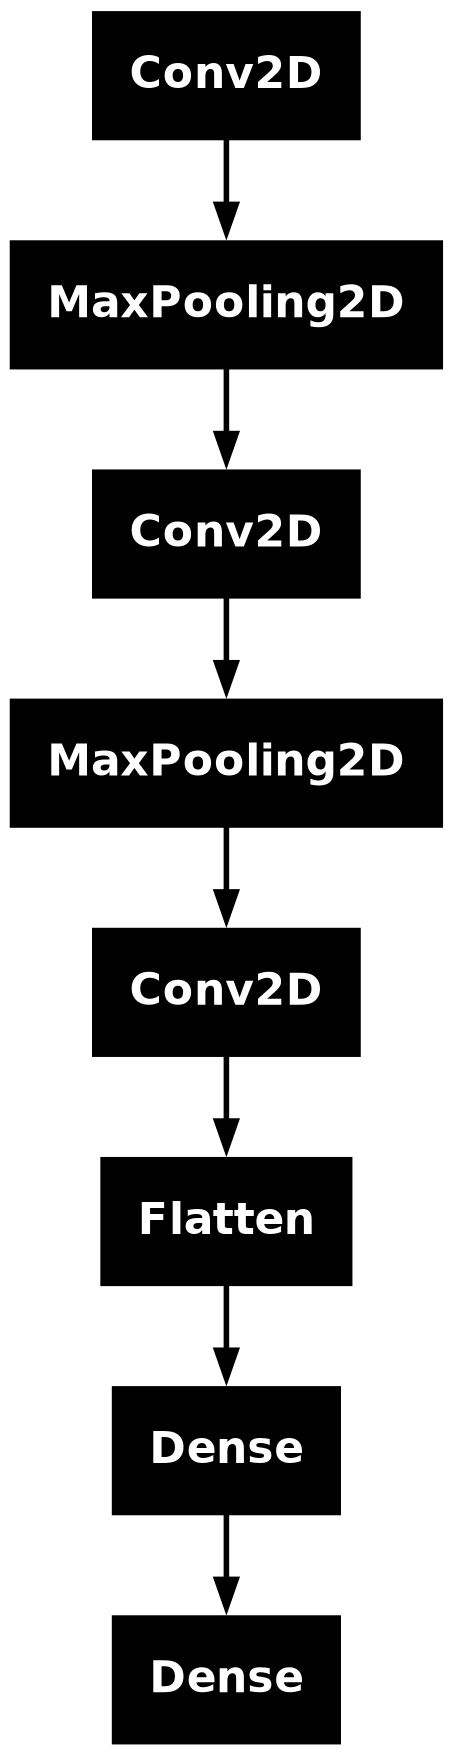

In [17]:
tf.keras.utils.plot_model(model= model)